<a href="https://colab.research.google.com/github/Iswaqasahmed/Machine-Learning/blob/master/Copy_of_image_classification_accuracy_increase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Test 4** <br>
**95 % accuracy**

In [ ]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.models import load_model
import keras
from keras.callbacks import ModelCheckpoint
#Image Size
img_width, img_height = 224, 224


# Reading training data from the directory
train_data_dir = '/content/drive/MyDrive/Car Vs Plan Data Sets/train'
# Reading validation data from the directory
validation_data_dir = '/content/drive/MyDrive/Car Vs Plan Data Sets/test'
# Total train instances
nb_train_samples =400
# Total Test instances
nb_validation_samples = 100
batch_size = 8


 # To check if the shape of input image is correct
if K.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)


# Defining Sequential CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))



# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])


checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)


#cearting virtual datastore for training data set
train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1. / 255,
shear_range=0.2,
zoom_range=0.3,
horizontal_flip=True,
fill_mode='nearest')

#cearting virtual datastore for testing data set
test_datagen = ImageDataGenerator(rescale=1. / 255)


# Fetching training data from folder
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='binary')



# Fetching testing data from folder
validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='binary')



# Fitting model
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),
validation_data=validation_generator,validation_steps=len(validation_generator), epochs=50, verbose=1, callbacks=[checkpoint])
model.save_weights('first_try.h5')  # always save your weights after training or during training


# list all data in history
print(history.history.keys())


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 31s 597ms/step - loss: 2.0030 - accuracy: 0.4967 - val_loss: 0.5417 - val_accuracy: 0.6900

Epoch 00001: val_accuracy improved from -inf to 0.69000, saving model to best_model.hdf5
Epoch 2/50
50/50 [==============================] - 30s 595ms/step - loss: 0.6440 - accuracy: 0.6714 - val_loss: 0.4993 - val_accuracy: 0.7500

Epoch 00002: val_accuracy improved from 0.69000 to 0.75000, saving model to best_model.hdf5
Epoch 3/50
50/50 [==============================] - 30s 593ms/step - loss: 0.5639 - accuracy: 0.7571 - val_loss: 0.4263 - val_accuracy: 0.7800

Epoch 00003: val_accuracy improved from 0.75000 to 0.78000, saving model to best_model.hdf5
Epoch 4/50
50/50 [==============================] - 30s 596ms/step - loss: 0.6152 - accuracy: 0.6637 - val_loss: 0.4483 - val_accuracy: 0.7600

Epoch 00004: val_accuracy did not improve from 0.78000
Epoch 5/50
50/50 [==============================] - 30s 592ms/step - loss: 0.5736 - accuracy: 0.

In [ ]:
# Model Evalution
_, acc = model.evaluate_generator(validation_generator,
steps=len(validation_generator),workers=1)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 95.000


In [ ]:
#Confution Matrix and Classification Report
y_pred = model.predict_generator(validation_generator,steps=len(validation_generator),workers=1)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion matrix')
array=confusion_matrix(validation_generator.classes, y_pred)
print('Classification Report')
target_names = ['Cars', 'Planes']
print(classification_report(validation_generator.classes, y_pred,target_names=target_names))
cp=classification_report(validation_generator.classes, y_pred,target_names=target_names)
#%%
# plot Confution Matrix
import seaborn as sns
import numpy as np
import pandas as pd
def plot_cm(y_true, y_pred, figsize=(6,4)):
  cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
  cm_sum = np.sum(cm, axis=1, keepdims=True)
  cm_perc = cm / cm_sum.astype(float) * 100
  annot = np.empty_like(cm).astype(str)
  nrows, ncols = cm.shape
  for i in range(nrows):
   for j in range(ncols):
     c = cm[i, j]
     p = cm_perc[i, j]
     if i == j:
      s = cm_sum[i]
      annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
     elif c == 0:
      annot[i, j] = ''
     else:
      annot[i, j] = '%.1f%%\n%d' % (p, c)
  cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
  cm.index.name = 'Actual'
  cm.columns.name = 'Predicted'
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
  x = np.array([0,1])
  my_xticks = ['Cars', 'Planes']
  plt.xticks(x, my_xticks,rotation=15)
  plt.yticks(x, my_xticks,rotation=60)
  plot_cm(validation_generator.classes, y_pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion matrix
Classification Report
              precision    recall  f1-score   support

        Cars       0.50      1.00      0.67        50
      Planes       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#for accuracy and lose plots
def summarize_diagnostics(history):
# plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['acc'], color='blue', label='train')
  pyplot.plot(history.history['val_acc'], color='orange', label='test')
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  pyplot.close()
  #%%

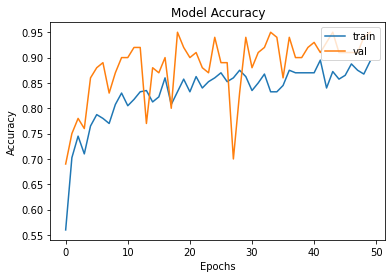

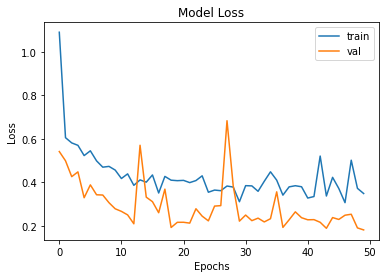

In [ ]:
#%%
# learning curves
#summarize_diagnostics(history)
# summarize history for accuracy
fig=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
#%%
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


In [ ]:
test_output_image_array = np.zeros(shape=(len(numpydata), 224, 224))

In [ ]:
#  # this converts our 3D feature maps to 1D feature vectors
# model.add(Flatten()) 
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [ ]:

# # this is the augmentation configuration we will use for training
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# # this is the augmentation configuration we will use for testing:
# # only rescaling
# test_datagen = ImageDataGenerator(rescale=1./255)

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
# train_generator = train_datagen.flow_from_directory(
#         train_data_dir,  # this is the target directory
#         target_size=(img_width, img_height),  # all images will be resized to 150x150
#         batch_size=batch_size,
#         class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# # this is a similar generator, for validation data
# validation_generator = test_datagen.flow_from_directory(
#         validation_data_dir,
#         target_size=(img_width, img_height),
#         batch_size=batch_size,
#         class_mode='binary')

In [ ]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=2000 // batch_size,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800 // batch_size)
# model.save_weights('first_try.h5')  # always save your weights after training or during training

**Bottle Neck**

In [ ]:

# generator = datagen.flow_from_directory(
#         'data/train',
#         target_size=(150, 150),
#         batch_size=batch_size,
#         class_mode=None,  # this means our generator will only yield batches of data, no labels
#         shuffle=False)  # our data will be in order, so all first 1000 images will be cats, then 1000 dogs
# # the predict_generator method returns the output of a model, given
# # a generator that yields batches of numpy data
# bottleneck_features_train = model.predict_generator(generator, 2000)
# # save the output as a Numpy array
# np.save(open('bottleneck_features_train.npy', 'w'), bottleneck_features_train)

# generator = datagen.flow_from_directory(
#         'data/validation',
#         target_size=(150, 150),
#         batch_size=batch_size,
#         class_mode=None,
#         shuffle=False)
# bottleneck_features_validation = model.predict_generator(generator, 800)
# np.save(open('bottleneck_features_validation.npy', 'w'), bottleneck_features_validation)

In [ ]:
# train_data = np.load(open('bottleneck_features_train.npy'))
# # the features were saved in order, so recreating the labels is easy
# train_labels = np.array([0] * 1000 + [1] * 1000)

# validation_data = np.load(open('bottleneck_features_validation.npy'))
# validation_labels = np.array([0] * 400 + [1] * 400)

# model = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_data, train_labels,
#           epochs=50,
#           batch_size=batch_size,
#           validation_data=(validation_data, validation_labels))
# model.save_weights('bottleneck_fc_model.h5')